# Supervised Approach

In [11]:
#Import the nessesary librarys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
# Load the data
df = pd.read_csv('Sentences_AllAgree.txt', sep='.@', names=['sentence', 'sentiment'], engine='python', encoding='ISO-8859-1')

In [13]:
df.head()

,sentence,sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [14]:
# Preprocess the data 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize a Porter stemmer
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

# Preprocess the sentences in the DataFrame
df['sentence'] = df['sentence'].apply(preprocess_text)

# Display the first few rows of the DataFrame
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentence,sentiment
0,accord gran compani plan move product russia a...,neutral
1,last quarter 2010 componenta net sale doubl eu...,positive
2,third quarter 2010 net sale increas 52 eur 205...,positive
3,oper profit rose eur 131 mn eur 87 mn correspo...,positive
4,oper profit total eur 211 mn eur 186 mn 2007 r...,positive


In [15]:
# Convert the sentences to Bag of Words features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['sentence'])
y = df['sentiment']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models and predict the sentiments of the test set
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(multi_class='ovr', solver='liblinear')),
    ('SVM', LinearSVC()),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print the classification report and accuracy
    print(f'{name}:\n{classification_report(y_test, y_pred)}\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')

Naive Bayes:
              precision    recall  f1-score   support

    negative       0.51      0.50      0.50        56
     neutral       0.91      0.87      0.89       276
    positive       0.68      0.75      0.72       121

    accuracy                           0.79       453
   macro avg       0.70      0.71      0.70       453
weighted avg       0.80      0.79      0.80       453


Accuracy: 0.7947019867549668

Logistic Regression:
              precision    recall  f1-score   support

    negative       0.77      0.66      0.71        56
     neutral       0.86      0.98      0.92       276
    positive       0.87      0.66      0.75       121

    accuracy                           0.85       453
   macro avg       0.83      0.77      0.79       453
weighted avg       0.85      0.85      0.85       453


Accuracy: 0.8543046357615894

SVM:
              precision    recall  f1-score   support

    negative       0.73      0.71      0.72        56
     neutral       0.89     

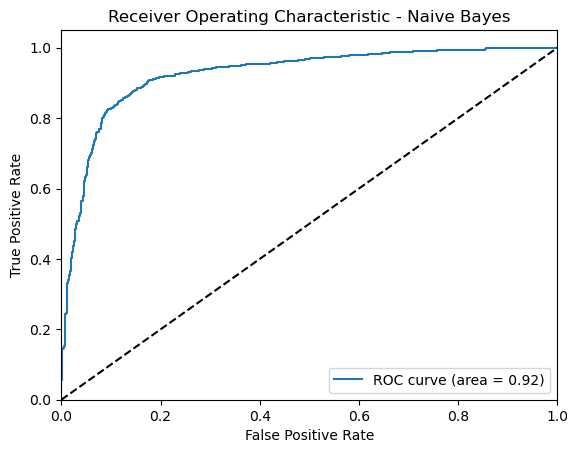

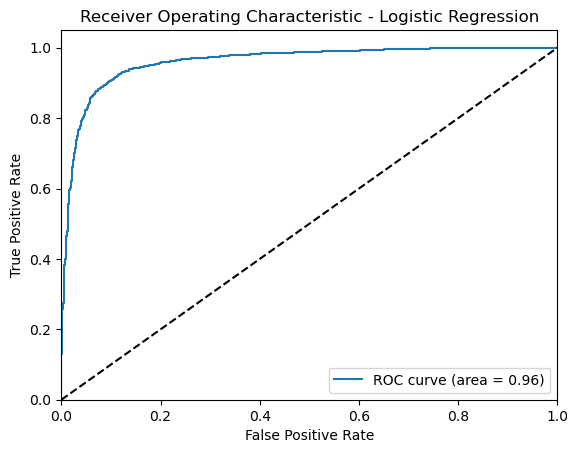

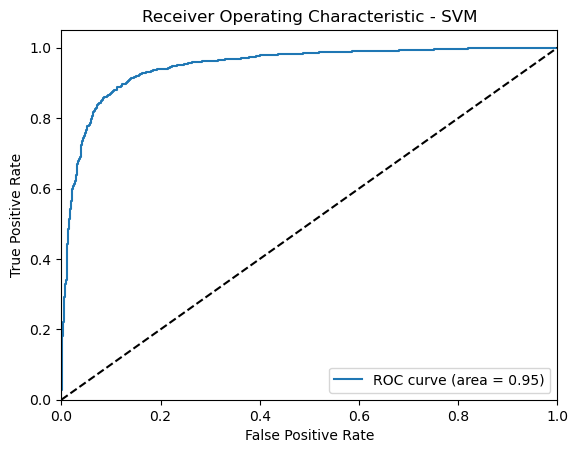

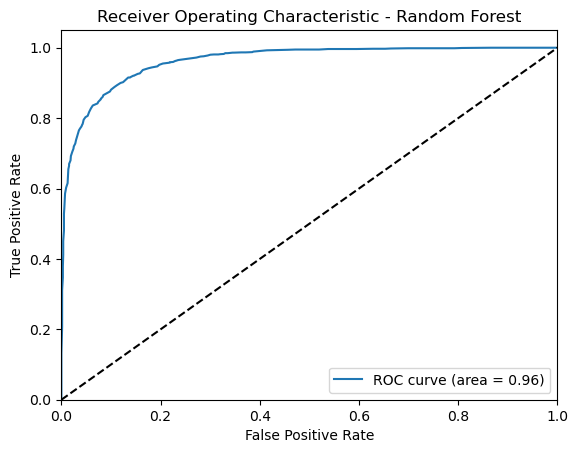

In [16]:
# Plot the ROC curves
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))

for name, model in models:
    if hasattr(model, 'decision_function'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    y_score = np.hstack((1 - y_score, y_score))
    
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc='lower right')
    plt.show()

# Unsupervised Approach

## Vader lexicon

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Use the polarity_scores method to get the sentiment metrics
sentiments = df['sentence'].apply(analyzer.polarity_scores)

# Convert the list of dicts into a DataFrame
sentiments_df = pd.DataFrame(list(sentiments))

# Print the resulting DataFrame
print(sentiments_df)


        neg    neu    pos  compound
0     0.000  1.000  0.000    0.0000
1     0.104  0.766  0.131    0.1531
2     0.000  0.838  0.162    0.4404
3     0.000  0.838  0.162    0.4404
4     0.000  0.818  0.182    0.4404
...     ...    ...    ...       ...
2259  0.000  0.818  0.182    0.4404
2260  0.069  0.721  0.210    0.5106
2261  0.361  0.546  0.092   -0.7506
2262  0.000  0.704  0.296    0.7430
2263  0.189  0.811  0.000   -0.2732

[2264 rows x 4 columns]


In [18]:
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiments_df['sentiment_class'] = sentiments_df['compound'].apply(classify_sentiment)

print(sentiments_df)


        neg    neu    pos  compound sentiment_class
0     0.000  1.000  0.000    0.0000         neutral
1     0.104  0.766  0.131    0.1531        positive
2     0.000  0.838  0.162    0.4404        positive
3     0.000  0.838  0.162    0.4404        positive
4     0.000  0.818  0.182    0.4404        positive
...     ...    ...    ...       ...             ...
2259  0.000  0.818  0.182    0.4404        positive
2260  0.069  0.721  0.210    0.5106        positive
2261  0.361  0.546  0.092   -0.7506        negative
2262  0.000  0.704  0.296    0.7430        positive
2263  0.189  0.811  0.000   -0.2732        negative

[2264 rows x 5 columns]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(df['sentiment'], sentiments_df['sentiment_class'])
precision = precision_score(df['sentiment'], sentiments_df['sentiment_class'], average='macro')
recall = recall_score(df['sentiment'], sentiments_df['sentiment_class'], average='macro')
f1 = f1_score(df['sentiment'], sentiments_df['sentiment_class'], average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.6073321554770318
Precision: 0.5305214872351948
Recall: 0.49847702050465365
F1 Score: 0.49476741091213405


## LDA, and HDP

In [20]:
!pip install gensim

     ---------------------------------------- 67.1/67.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=c8751a4094b60939bdff06dcb8dbf81bbda5eea5afd7702bdd5fd18ca887314e
  Stored in directory: c:\users\simen\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=918b92273ffa284b30c4b5822dee22561d849a42aa3e2749129144e3cb1c4099
  Stored in directory: c:\users\simen\appdata\local\pip\cache\wheels\43\aa\48\5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful


In [23]:
from gensim.models import LdaModel, HdpModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

# Tokenize the sentences
df['tokens'] = df['sentence'].apply(word_tokenize)

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(df['tokens'])

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3)

# Train the HDP model
hdp = HdpModel(corpus=corpus, id2word=dictionary)

# Convert the HDP model to an LDA model
hdp_lda = hdp.suggested_lda_model()

# Get the topic distribution for each document
lda_topics = [lda.get_document_topics(doc) for doc in corpus]
hdp_topics = [hdp_lda.get_document_topics(doc) for doc in corpus]

# Print the topic distribution for the first document
print(lda_topics[0])
print(hdp_topics[0])


[(0, 0.14713271), (1, 0.632896), (2, 0.2199713)]
[(0, 0.43985625052648325), (1, 0.47530633468361283)]


In [24]:
# Assign each sentence to the topic with the highest probability
df['lda_topic'] = [max(lda_topic, key=lambda x: x[1])[0] for lda_topic in lda_topics]
df['hdp_topic'] = [max(hdp_topic, key=lambda x: x[1])[0] for hdp_topic in hdp_topics]

print(df)


                                               sentence sentiment  \
0     accord gran compani plan move product russia a...   neutral   
1     last quarter 2010 componenta net sale doubl eu...  positive   
2     third quarter 2010 net sale increas 52 eur 205...  positive   
3     oper profit rose eur 131 mn eur 87 mn correspo...  positive   
4     oper profit total eur 211 mn eur 186 mn 2007 r...  positive   
...                                                 ...       ...   
2259  oper result 12month period decreas profit eur0...  negative   
2260  helsinki thomson financi share cargotec fell s...  negative   
2261  london marketwatch share price end lower londo...  negative   
2262  oper profit fell eur 354 mn eur 688 mn 2007 in...  negative   
2263  sale finland decreas 105 januari sale outsid f...  negative   

                                                 tokens  lda_topic  hdp_topic  
0     [accord, gran, compani, plan, move, product, r...          1          1  
1     [last

In [25]:
# Print the most probable words for each topic
for i in range(3):
    print(f'LDA Topic {i}:')
    print(lda.show_topic(i))
    
for i in range(2):
    print(f'HDP Topic {i}:')
    print(hdp_lda.show_topic(i))


LDA Topic 0:
[('share', 0.014033001), ('million', 0.013704308), ('net', 0.01301214), ('sale', 0.0115676), ('profit', 0.011310584), ('year', 0.00992098), ('oper', 0.009093667), ('2009', 0.008839324), ('eur', 0.007818652), ('2010', 0.007523967)]
LDA Topic 1:
[('eur', 0.06867971), ('mn', 0.05388606), ('profit', 0.026792033), ('oper', 0.021789145), ('net', 0.016548587), ('sale', 0.016451687), ('decreas', 0.015927317), ('mln', 0.015789708), ('quarter', 0.01315644), ('period', 0.013082358)]
LDA Topic 2:
[('compani', 0.008454051), ('sale', 0.0076003615), ('said', 0.0074164867), ('market', 0.0062690526), ('servic', 0.0061846497), ('share', 0.0060555586), ('euro', 0.0059841564), ('price', 0.0058182017), ('mln', 0.0050978228), ('total', 0.004903496)]
HDP Topic 0:
[('cater', 0.00026253066737364704), ('jorgen', 0.00024902488649037035), ('usd0', 0.00024088811047321955), ('cet', 0.00023988678236245415), ('pirkka', 0.00023983288477944702), ('addit', 0.0002377435166348226), ('deka', 0.0002375684122004

In [26]:
# Define the sentiment of each topic
lda_topic_sentiments = {0: 'neutral', 1: 'neutral', 2: 'neutral'}
hdp_topic_sentiments = {0: 'undefined', 1: 'undefined'}

# Assign sentiments to each sentence based on its topic
df['lda_sentiment'] = df['lda_topic'].map(lda_topic_sentiments)
df['hdp_sentiment'] = df['hdp_topic'].map(hdp_topic_sentiments)

print(df)


                                               sentence sentiment  \
0     accord gran compani plan move product russia a...   neutral   
1     last quarter 2010 componenta net sale doubl eu...  positive   
2     third quarter 2010 net sale increas 52 eur 205...  positive   
3     oper profit rose eur 131 mn eur 87 mn correspo...  positive   
4     oper profit total eur 211 mn eur 186 mn 2007 r...  positive   
...                                                 ...       ...   
2259  oper result 12month period decreas profit eur0...  negative   
2260  helsinki thomson financi share cargotec fell s...  negative   
2261  london marketwatch share price end lower londo...  negative   
2262  oper profit fell eur 354 mn eur 688 mn 2007 in...  negative   
2263  sale finland decreas 105 januari sale outsid f...  negative   

                                                 tokens  lda_topic  hdp_topic  \
0     [accord, gran, compani, plan, move, product, r...          1          1   
1     [la

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores for each sentence
df['sentiment_scores'] = df['sentence'].apply(lambda sentence: sid.polarity_scores(sentence))

# Assign sentiment labels based on the compound score
df['sentiment_class'] = df['sentiment_scores'].apply(lambda score_dict: 'positive' if score_dict['compound'] > 0 else ('neutral' if score_dict['compound'] == 0 else 'negative'))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\simen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


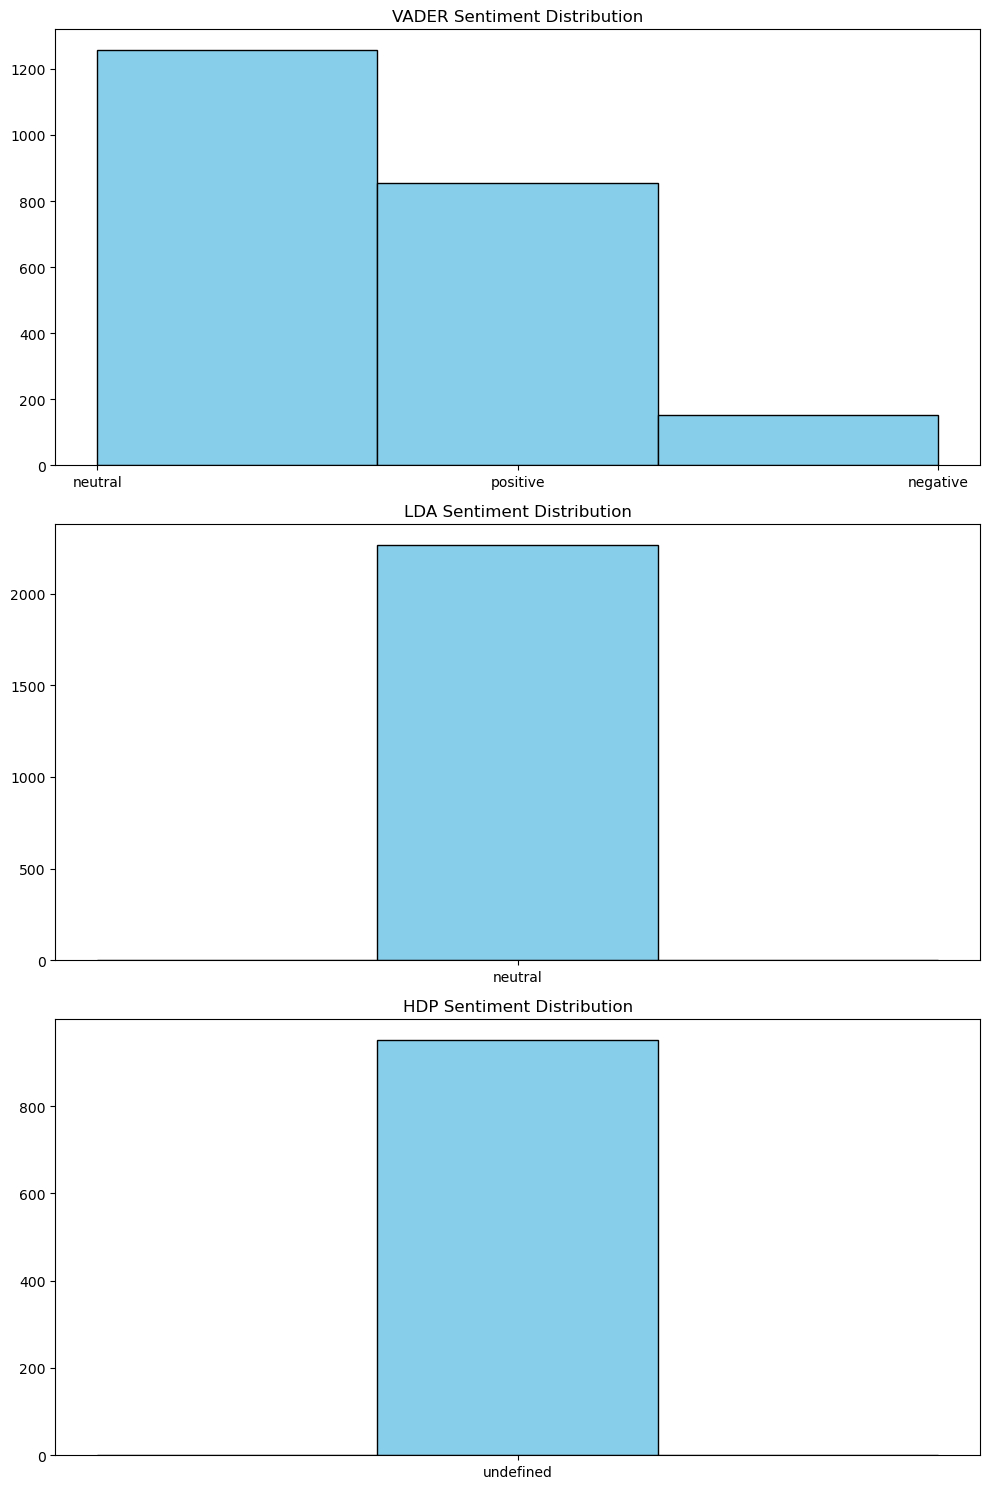

In [29]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution for each method
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].hist(df['sentiment_class'], bins=3, color='skyblue', edgecolor='black')
axs[0].set_title('VADER Sentiment Distribution')

axs[1].hist(df['lda_sentiment'], bins=3, color='skyblue', edgecolor='black')
axs[1].set_title('LDA Sentiment Distribution')

axs[2].hist(df['hdp_sentiment'].dropna(), bins=3, color='skyblue', edgecolor='black')
axs[2].set_title('HDP Sentiment Distribution')

plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Encoding the sentiment classes
le = LabelEncoder()

# Ground truth
y_true = le.fit_transform(df['sentiment_class'])

# LDA predictions
y_pred_lda = le.transform(df['lda_sentiment'])

# HDP predictions
y_pred_hdp = le.transform(df['hdp_sentiment'].replace('undefined', 'neutral').fillna('neutral'))  # Replacing 'undefined' and NaN values with 'neutral'


# Creating a function to calculate the metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Calculating metrics for LDA
lda_accuracy, lda_precision, lda_recall, lda_f1 = calculate_metrics(y_true, y_pred_lda)

# Calculating metrics for HDP
hdp_accuracy, hdp_precision, hdp_recall, hdp_f1 = calculate_metrics(y_true, y_pred_hdp)

lda_metrics = {'Accuracy': lda_accuracy, 'Precision': lda_precision, 'Recall': lda_recall, 'F1 Score': lda_f1}
hdp_metrics = {'Accuracy': hdp_accuracy, 'Precision': hdp_precision, 'Recall': hdp_recall, 'F1 Score': hdp_f1}

lda_metrics, hdp_metrics


C:\Users\simen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Accuracy': 0.5552120141342756,
  'Precision': 0.30826038063903904,
  'Recall': 0.5552120141342756,
  'F1 Score': 0.3964223242072051},
 {'Accuracy': 0.5552120141342756,
  'Precision': 0.30826038063903904,
  'Recall': 0.5552120141342756,
  'F1 Score': 0.3964223242072051})